In [245]:
# 모듈 로딩
import tensorflow as tf
from tensorflow.keras import Sequential, Input   # 모델 객체
from tensorflow.keras.layers import Dense, Dropout    # 레이어 객체
from tensorflow.keras.datasets.boston_housing import load_data
import numpy as np

## [1] 데이터 로딩
---

In [246]:
# 학습용, 테스트용 = 8:2
(x_train, y_train), (x_test, y_test) = load_data()

In [247]:
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [248]:
x_train[:1], y_train[0]

(array([[  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
          91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
          18.72   ]]),
 15.2)

### [1-1] 전처리
---
- 특성(Feature) 전처리
    * 수치 데이터 : 값의 범위
    * 문자 데이터 : 수치화

In [249]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [250]:
scaler=StandardScaler()

In [251]:
scaler.fit(x_train)

StandardScaler()

In [252]:
scaler.mean_, scaler.scale_

(array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
        5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
        9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
        1.27408168e+01]),
 array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
        1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
        8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
        7.24556085e+00]))

In [253]:
x_train_scaled = scaler.transform(x_train)

### [2] NN Model 실습
---
- (1) 모델 구상
- (2) 모델 생성
- (3) 학습
- (4) 평가
- (5) 테스트

### [2-1] 모델 구상
- 입력 데이터 => 13 특성
- 출력 데이터 => 1 집값

In [254]:
# NN Model의 Layer를 층층이 담아서 관리하는 객체
model = Sequential(name='BostonNNM')

In [255]:
# Layer 추가하기
model.add( Input(shape=(13,), name='input'))
model.add( Dense(30, activation='relu', name='hidden-1'))

# 과적합을 해결하기 위해서 Dropout() 사용, 지정된 비율만큼 node를 비활성화
model.add( Dropout(0.5))
model.add( Dense(10, activation='relu', name='hidden-2'))
# 회귀 => 출력층
model.add( Dense(1, activation='linear', name='output'))

In [256]:
# 모델 구성 확인 => summary()
model.summary()

Model: "BostonNNM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 30)                420       
                                                                 
 dropout_5 (Dropout)         (None, 30)                0         
                                                                 
 hidden-2 (Dense)            (None, 10)                310       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 741
Trainable params: 741
Non-trainable params: 0
_________________________________________________________________


### [2-2] 모델 생성
---
- Sequential 클래스의 compile 메서드
- 모델이 동작하기 위해서 필요한 설정
    * 오차 계산 함수 설정 => loss
    * W, B 최적화 방식 설정 => optimizer
    * 모델의 성능 측정 항목 설정 => metrics
- 파라미터 값들
    * str 타입으로 입력 가능
    * 객체 타입으로 입력 가능

In [257]:
model.compile(loss='mse', optimizer='adam', metrics='mae')

### [2-3] 학습
---
- fit() 메서드
    * 파라미터
    * 반환값 => History 객체

In [258]:
from tensorflow.keras.callbacks import EarlyStopping

# 검증 데이터에 대한 loss값 3번 연속 개선되지 않으면 학습 중지
stopCB = EarlyStopping(monitor='val_loss', patience=3)

In [259]:
result = model.fit(x_train,
                  y_train,
                  epochs=1000,
                  batch_size=10,
                  validation_data=(x_test, y_test),
                  callbacks=[stopCB])

Epoch 1/1000
41/41 [==============================] - 1s 6ms/step - loss: 2667.2422 - mae: 39.7245 - val_loss: 227.1863 - val_mae: 12.2973
Epoch 2/1000
41/41 [==============================] - 0s 3ms/step - loss: 1270.8652 - mae: 26.7465 - val_loss: 191.5039 - val_mae: 10.7918
Epoch 3/1000
41/41 [==============================] - 0s 2ms/step - loss: 800.3931 - mae: 21.6393 - val_loss: 177.9624 - val_mae: 10.7611
Epoch 4/1000
41/41 [==============================] - 0s 3ms/step - loss: 587.6990 - mae: 18.8474 - val_loss: 149.5511 - val_mae: 9.6424
Epoch 5/1000
41/41 [==============================] - 0s 3ms/step - loss: 438.1953 - mae: 16.4555 - val_loss: 177.6435 - val_mae: 11.0161
Epoch 6/1000
41/41 [==============================] - 0s 4ms/step - loss: 380.7665 - mae: 14.6812 - val_loss: 134.4679 - val_mae: 9.1144
Epoch 7/1000
41/41 [==============================] - 0s 3ms/step - loss: 344.5245 - mae: 14.2662 - val_loss: 144.7672 - val_mae: 9.5987
Epoch 8/1000
41/41 [===============

In [260]:
# 학습 후 학습 결과 체크 => History 객체
type(result)

keras.callbacks.History

In [261]:
result.params

{'verbose': 1, 'epochs': 1000, 'steps': 41}

In [262]:
result.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [263]:
result.history['loss'], result.history['mae']

([2667.2421875,
  1270.865234375,
  800.3931274414062,
  587.6990356445312,
  438.1952819824219,
  380.76654052734375,
  344.52447509765625,
  297.2638854980469,
  305.291259765625],
 [39.72450637817383,
  26.74649429321289,
  21.63926887512207,
  18.847396850585938,
  16.455474853515625,
  14.681153297424316,
  14.266154289245605,
  13.168994903564453,
  13.299627304077148])

In [264]:
## 시각화 --------------------------------------------

In [265]:
import matplotlib.pyplot as plt

In [266]:
result.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8]

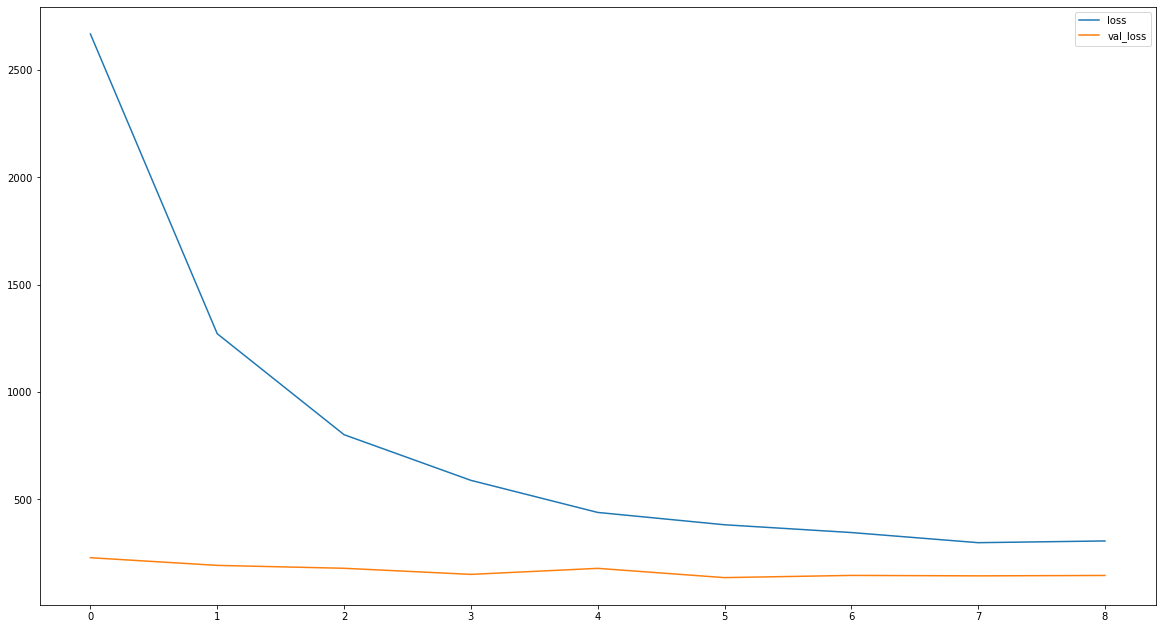

In [267]:
plt.figure(figsize=(20,11))
plt.plot(result.epoch, result.history['loss'], label='loss')
plt.plot(result.epoch, result.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


### [2-4] 평가
---
- evaluate() 메서드
    * 파라미터 : test_data, test_target
    * 반환값 : loss, compile()의 metrics 에서 설정한 항목값

In [268]:
eRet = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 144.5266 - mae: 9.6036


In [269]:
eRet  # 낮을수록 좋음

[144.5265655517578, 9.603621482849121]

### [2-5] 예측
---
- predict()

In [270]:
model.predict(x_train[:1])

1/1 [==============================] - 0s 98ms/step


array([[14.675402]], dtype=float32)

In [271]:
model1 = Sequential([Dense(10, activation='relu', input_shape=(3,)),
                    Dense(5, activation='relu'),
                    Dense(1, activation='sigmoid')])

In [272]:
model1 = Sequential()
model1.add(Dense(10, activation='relu', input_shape=(3,)))
model1.add(Dense(10, activation='relu'))

In [273]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                40        
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
Total params: 150
Trainable params: 150
Non-trainable params: 0
_________________________________________________________________


# 손글씨 숫자 식별 모델 
---
- 데이터 : MNIST 데이터 사용
- 학습모델 : 신경망 모델
- 동작 : 0 ~ 9 사이 숫자 판별

In [274]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split

## [1] 데이터 로딩 및 준비

In [275]:
(x_train, y_train), (x_test, y_test) = load_data()

In [276]:
print(f'x_train.shape : {x_train.shape}, x_test.shape : {x_test.shape}')
print(f'y_train.shape : {y_train.shape}, y_test.shape : {y_test.shape}')

x_train.shape : (60000, 28, 28), x_test.shape : (10000, 28, 28)
y_train.shape : (60000,), y_test.shape : (10000,)


In [277]:
# 검증용 데이터 셋 준비
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                 y_train,
                                                 stratify=y_train)

In [278]:
print(f'x_train.shape : {x_train.shape}, x_val.shape : {x_val.shape}')
print(f'x_train.shape : {y_train.shape}, y_val.shape : {y_val.shape}')      

x_train.shape : (45000, 28, 28), x_val.shape : (15000, 28, 28)
x_train.shape : (45000,), y_val.shape : (15000,)


## [2] 데이터 전처리
---
- 수치 데이터 => 스케일링
- 범주형 데이터 => 원핫인코딩

In [279]:
# 저장된 값 확인
x_train[0], y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   1,  13,  48, 255, 254, 254, 173,  13,
          13,   7,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,  36, 252, 252, 252, 252, 252, 252, 252,
         252, 142,  25,  25,  10,   0,   0,   0,   0,   0,   0,   0,   0,
           0

In [280]:
# 이미지 데이터의 픽셀값 즉 특성(Feature) 0.0~1.0으로 스케일링
x_train = x_train/255.0  # 실수로 나오게 하려고 .0 함
x_val = x_val/255.0
x_test = x_test/255.0

In [281]:
# 타겟 라벨 => OneHotEncoding으로 변환
from sklearn.preprocessing import OneHotEncoder

In [282]:
encoder = OneHotEncoder()
encoder.fit(y_train.reshape(-1,1))
y_train =encoder.transform(y_train.reshape(-1,1))

In [283]:
type(y_train)  # 희소 행렬

scipy.sparse.csr.csr_matrix

In [284]:
y_train = y_train.toarray()

In [285]:
print(f'y_train : {type(y_train)}\ny_train[0] : {y_train[0]}')

y_train : <class 'numpy.ndarray'>
y_train[0] : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [286]:
y_test=encoder.transform(y_test.reshape(-1,1))
y_val=encoder.transform(y_val.reshape(-1,1))

In [287]:
y_test = y_test.toarray()
y_val = y_val.toarray()

In [288]:
# Dense Layer 입력 형태로 변환
x_train.shape

(45000, 28, 28)

In [289]:
x_train = x_train.reshape(-1, 28*28)
x_train.shape, y_train.shape

((45000, 784), (45000, 10))

In [290]:
x_val = x_val.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [291]:
x_val.shape, x_test.shape

((15000, 784), (10000, 784))

## [3] 모델 생성
---
- (1) 모델 구성
- (2) 모델 생성

### [3-1] 모델 구성
---
- 입력 데이터 : 784 => 28 * 28 이미지 데이터
- 출력 데이터 : 10 => 0 ~ 9 숫자 라벨
- 학습 방법 : 분류 - 다중분류

In [292]:
model = Sequential(name='MNIST_NNModel')

In [293]:
# Layer 생성 => Node(퍼셉트론, 뉴런) 개수, 활성화함수, [옵]inpurt_shape param
model.add( Dense(250, activation='relu', input_shape=(784,)))

In [294]:
model.add( Dropout(0.3))

In [295]:
model.add( Dense(100, activation='relu'))

In [296]:
model.add( Dropout(0.3))

In [297]:
# 출력 Layer 생성 => Node(퍼셉트론, 뉴런) 개수, 활성화함수
model.add( Dense(10, activation='softmax'))

In [298]:
model.summary()

Model: "MNIST_NNModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 250)               196250    
                                                                 
 dropout_6 (Dropout)         (None, 250)               0         
                                                                 
 dense_31 (Dense)            (None, 100)               25100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_32 (Dense)            (None, 10)                1010      
                                                                 
Total params: 222,360
Trainable params: 222,360
Non-trainable params: 0
_________________________________________________________________


### [3-2] 모델 생성
---
- loss 함수 => crossentropy
    * 이진분류 : binary_crossentropy
    * 다중분류 : sparse_categorical_crossentropy, categorical_crossentropy
- optimizer 기법 => 'rmsprop'
- metrics 평가항목 => 'loss'

In [299]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics='accuracy')

## [4] 학습

In [300]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [301]:
stopCB = EarlyStopping(monitor='val_loss', patience=2)

In [302]:
MODEL_PATH = 'model.{epoch:02d}-{val_loss:.2f}.h5'
modelCB = ModelCheckpoint(filepath=MODEL_PATH)  # 데이터가 많을 때 저장 해놓으려고 씀

In [303]:
his = model.fit(x_train, y_train,
               epochs=10,
               validation_data=(x_val, y_val),
               callbacks=[stopCB, modelCB])  # 많이 씀

Epoch 1/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3442 - accuracy: 0.8965 - val_loss: 0.1561 - val_accuracy: 0.9515
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1668 - accuracy: 0.9498 - val_loss: 0.1181 - val_accuracy: 0.9637
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1262 - accuracy: 0.9617 - val_loss: 0.1030 - val_accuracy: 0.9684
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1047 - accuracy: 0.9678 - val_loss: 0.1043 - val_accuracy: 0.9691
Epoch 5/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0933 - accuracy: 0.9718 - val_loss: 0.0981 - val_accuracy: 0.9718
Epoch 6/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0819 - accuracy: 0.9745 - val_loss: 0.0858 - val_accuracy: 0.9758
Epoch 7/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0764 - accuracy: 0.9756 - val_loss: 0.0907 - val_accuracy:

In [304]:
# 학습 진행 결과 시각화
import matplotlib.pyplot as plt

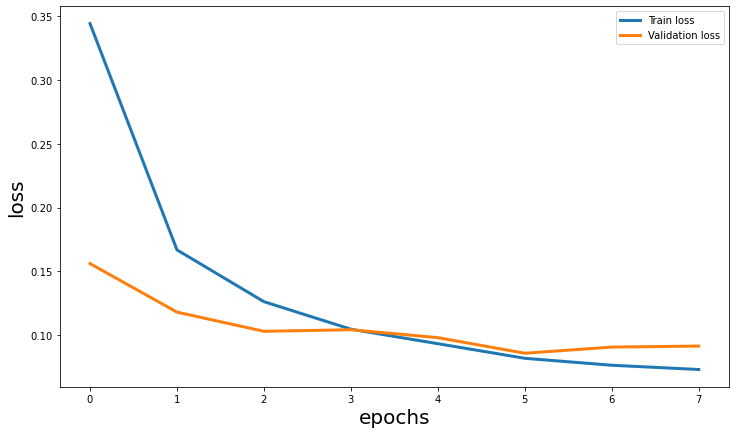

In [305]:
plt.figure(figsize=(12,7))
plt.plot(his.epoch, his.history['loss'], label='Train loss', linewidth=3)
plt.plot(his.epoch, his.history['val_loss'], label='Validation loss', linewidth=3)
plt.xlabel('epochs', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.legend()
plt.show()

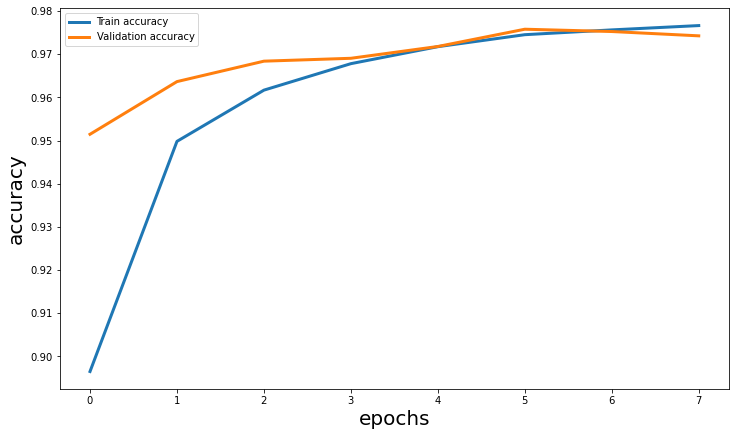

In [306]:
plt.figure(figsize=(12,7))
plt.plot(his.epoch, his.history['accuracy'], label='Train accuracy', linewidth=3)
plt.plot(his.epoch, his.history['val_accuracy'], label='Validation accuracy', linewidth=3)
plt.xlabel('epochs', fontsize=20)
plt.ylabel('accuracy', fontsize=20)
plt.legend()
plt.show()

## [5] 평가
---
- evaluate() 메서드
    * test data, target
    * 반환값 : loss, metrics에서 지정한 성능평가 항목

In [307]:
test_result = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0824 - accuracy: 0.9760


In [308]:
x_test[0].shape, type(x_test[0]), x_test[0].reshape(-1,784)

((784,),
 numpy.ndarray,
 array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         

## [6] 테스트/예측

In [309]:
pre_label = model.predict(x_test[0].reshape(-1,784))

1/1 [==============================] - 0s 62ms/step


In [310]:
import numpy as np
np.round(pre_label, 2)  # 예측

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [311]:
y_test[0]  # 실제

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])